In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
import xlrd
from sklearn.decomposition import PCA 
pd.options.display.float_format = '{:.3f}'.format

In [3]:
file = ('C:\\Users\\Abe\\Data Science Bootcamp\\Unit 2\\Crime\\table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls')
df = pd.read_excel(file, header=4)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [4]:
cols = ['city', 'population', 'violent_crime', 'murder_mans','rape1','rape2',
        'robbery', 'agg_ass','prop_crime','burglary','larc_theft','gta','arson']

df.columns = cols
dfcl = df.drop(['rape1','arson'],axis=1)
dfcl = dfcl.dropna()
dfcl.drop(dfcl[dfcl['population'] > 100000].index,inplace=True)

In [5]:
dfcl.head()

,city,population,violent_crime,murder_mans,rape2,robbery,agg_ass,prop_crime,burglary,larc_theft,gta
0,Adams Village,1861.000,0.000,0.000,0.000,0.000,0.000,12.000,2.000,10.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,0.000,0.000,3.000,24.000,3.000,20.000,1.000
2,Akron Village,2846.000,3.000,0.000,0.000,0.000,3.000,16.000,1.000,15.000,0.000
3,Albany,97956.000,791.000,8.000,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000
4,Albion Village,6388.000,23.000,0.000,3.000,4.000,16.000,223.000,53.000,165.000,5.000


In [6]:
# Correlation of the data set.
# Prop_crime is the aggregation of burglary, larc_theft and gta so we cannot use those in our model
# violent_crime has the same issue

dfcl.drop(['violent_crime','burglary','larc_theft','gta'],axis=1,inplace=True)
dfcl.corr()

,population,murder_mans,rape2,robbery,agg_ass,prop_crime
population,1.000,0.490,0.592,0.643,0.627,0.849
murder_mans,0.490,1.000,0.680,0.797,0.779,0.593
rape2,0.592,0.680,1.000,0.731,0.810,0.787
robbery,0.643,0.797,0.731,1.000,0.950,0.773
agg_ass,0.627,0.779,0.810,0.950,1.000,0.813
prop_crime,0.849,0.593,0.787,0.773,0.813,1.000


c:\users\abe\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


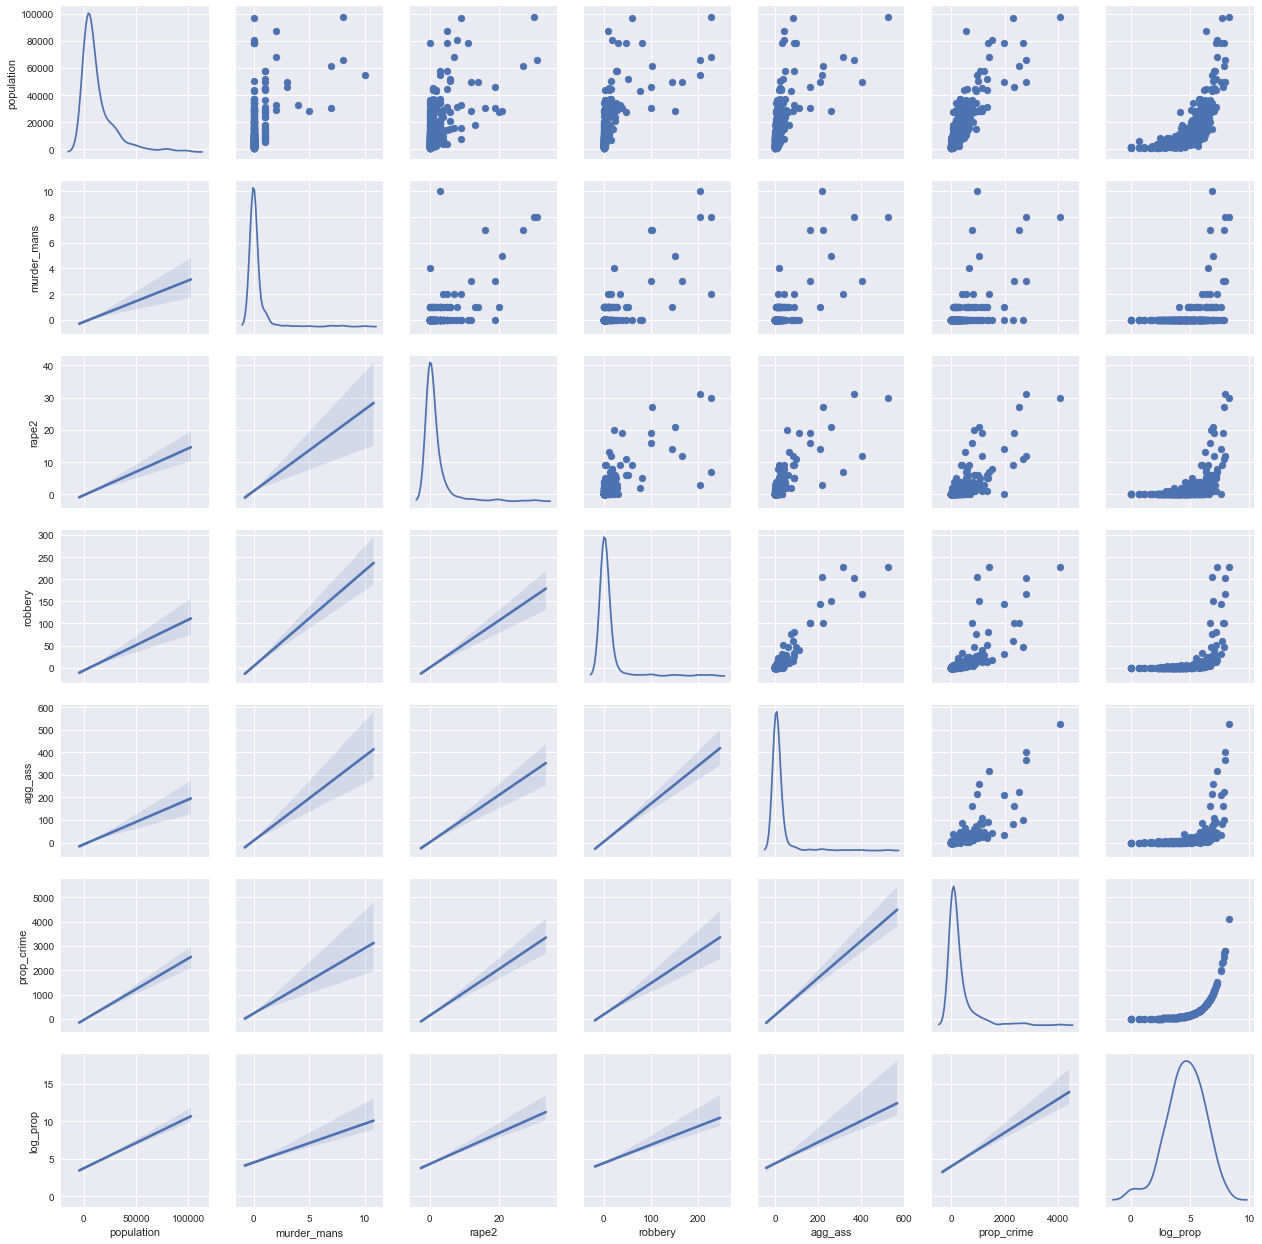

In [19]:
# Look at population outliers
# Removed largest city. Maybe remove cities less than 100K and only focus on small cities?
g = sns.PairGrid(dfcl, diag_sharey=False)
g.map_upper(plt.scatter)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot)
plt.show()

In [20]:
# Lets look at the regression

regr = linear_model.LinearRegression()

x = dfcl[['population','murder_mans','rape2','robbery','agg_ass']]
y = dfcl['prop_crime']

regr.fit(x, y)

print ('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [  1.57390586e-02  -5.63765634e+01   3.11909156e+01  -1.18553103e+00
   4.10337189e+00]
Intercept: 
 -20.8374061991
